In [10]:
import deepNN as dnn
import torch
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
a, b = 0, 1
N = 100

torch.manual_seed(0) # fix the seed
x = (b - a) * torch.rand(N, 1) + a
# def func(x): return torch.sin(np.pi*x) 
# def dfunc(x): return np.pi*torch.cos(np.pi*x) 
# def deltafunc(x): return np.pi**2*torch.sin(np.pi*x) 
def func(x): return x**(3./2) 
def dfunc(x): return 3./2*x**(1./2)
def deltafunc(x): return -3./4*x**(-1./2)

y = func(x) 

nn = dnn.ResNet(torch.tanh, 1, [20]*4, 1) 
nn.box_init()

n_epochs = 50
n_lsgd_it = 12

def loss(x, data, net):
    y_pred = net(x)
    return 1.0/len(data) * torch.sum((y_pred - data)**2)

nn.lsgd(n_epochs, n_lsgd_it, input_data=x, data=y, loss_fun=loss)

Main it 11, Loss 2.5e-20: 100%|██████████| 50/50 [00:00<00:00, 204.92it/s]


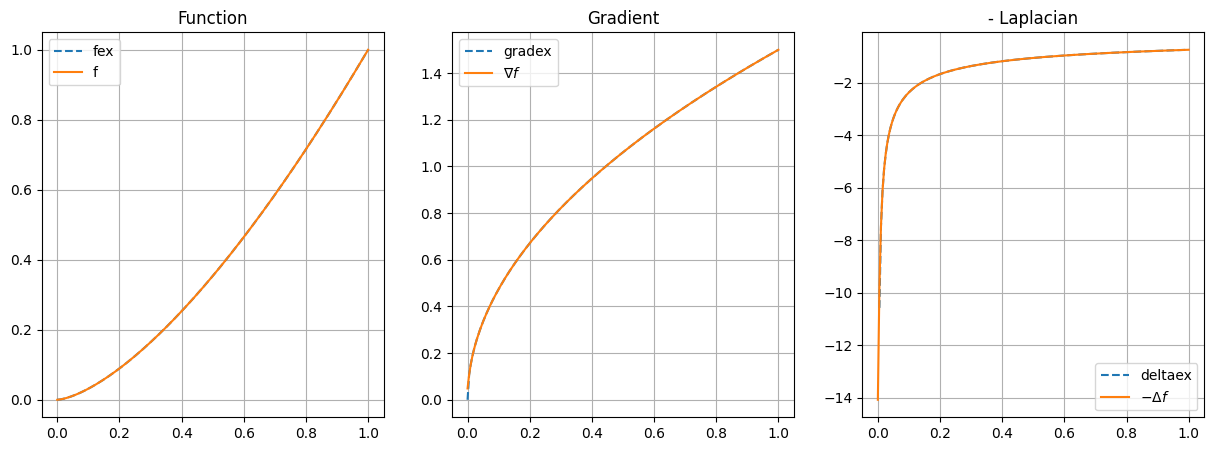

Report:
L2 error:3.263940248319734e-06
H1 semi-norm error:0.0034395538957201054


In [12]:
x = torch.linspace(0, 1, 200)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

yex = func(x).detach().cpu()
dyex = dfunc(x).detach().cpu()
deltaex = deltafunc(x).detach().cpu()

x_np = x.detach().cpu()
 
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(x_np, yex, '--', label='fex')
plt.plot(x_np, y.detach().cpu(), label='f')
plt.legend()
plt.grid()
plt.title('Function')

plt.subplot(1, 3, 2)
plt.plot(x_np, dyex, '--', label='gradex')
plt.plot(x_np, dy.flatten().detach().cpu(), label=r"$\nabla f$")
plt.legend()
plt.grid()
plt.title('Gradient')

plt.subplot(1, 3, 3)
plt.plot(x_np, deltaex, '--', label='deltaex')
plt.plot(x_np, deltay.detach().cpu(), label=r"$-\Delta f$")
plt.legend()
plt.grid()
plt.title('- Laplacian')
plt.show()


print('Report:')
print('L2 error:' + str(np.linalg.norm(y.flatten().detach().cpu()  -  yex)/np.sqrt(len(x_np))))
print('H1 semi-norm error:' + str(np.linalg.norm(dy.flatten().detach().cpu() - dyex)/np.sqrt(len(x_np))))

# Basis functions
By plotting the output of the last hidden layer, we see that they are basically constant - but the output layer's weights are rather big.

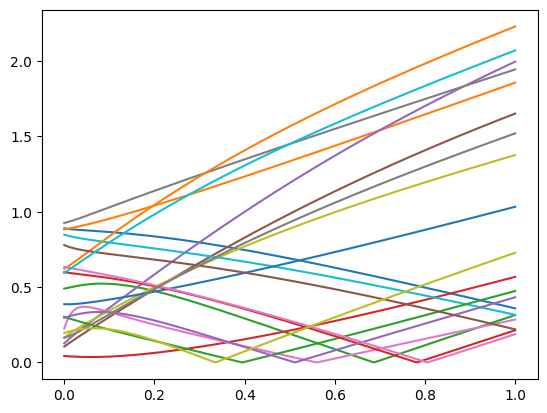

In [13]:
x = torch.linspace(0, 1, 300)

last_hidden_output = nn.output_layer(x, nn.L-1)
size_out = last_hidden_output.shape[1]

y = last_hidden_output@nn.output.weight.t()
x_np = x.detach().cpu()
out_np = last_hidden_output.detach().cpu()
plt.plot(x_np, np.abs(out_np))


In [14]:
nn.output.weight

Parameter containing:
tensor([[ 3594.2943,  4479.1511,  -660.0378,    67.1153,  1390.4581, -1311.0062,
           351.3363, -5241.8588,   382.1515, -2048.5205,   381.2444,  -676.8054,
           129.2004, -2269.0923,  -322.4395,  1590.4221, -1764.2136,  -260.4257,
           432.9536,  1880.7914]], device='cuda:0')